<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Introduction to Matplotlib and Line Plots 


Estimated time needed: **20** minutes
    

## Objectives

After completing this lab you will be able to:

* Create Data Visualization with Python
* Use various Python libraries for visualization


## Introduction

The aim of these labs is to introduce you to introduction you to Matplotlib and creating Line Plots.
Please make sure that you have completed the prerequisites for this course, namely [**Python Basics for Data Science**](https://www.edx.org/course/python-basics-for-data-science-2) and [**Analyzing Data with Python**](https://www.edx.org/course/data-analysis-with-python).

------------


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [*pandas* Refresher](#0)<br>
2. [The Dataset: Immigration to Canada from 1980 to 2013](#1)<br>
3. [Visualizing Data using Matplotlib](#8) <br>
    [Matplotlib: Standard Python Visualization Library](#3) <br>
5. [Line Plots](#4)
</div>


## *pandas* Refresher<a id="0"></a>

The course heavily relies on *pandas* for data wrangling, analysis. Refresh your Panads skill quickly with the lab on [Data pre-processing with Pandas](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/v4/DV0101EN-Exercise-Dataset-Preprocessing-Exploring-with-Pandas.ipynb)

*pandas* is an essential data analysis toolkit for Python.
<br>
#### We encourage you to spend some time and familiarize yourself with the *pandas*  from the [website](http://pandas.pydata.org/)


### The Dataset: Immigration to Canada from 1980 to 2013 <a id="2"></a>


Dataset Source: [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows).
In this lab, we will focus on the Canadian immigration data. <br><br>We have already **pre-processed** the data, we will use the **clean data** saved in the csv format for this lab.
The Canada Immigration dataset can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv">here</a>.

---


Next, we'll do is import two key data analysis modules: *pandas* and *numpy*


In [9]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Let's download and import our primary Canadian Immigration dataset using *pandas*'s `read_csv
()` method.


In [10]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's view the top 5 rows of the dataset using the `head()` function.


In [11]:
df_can.head()
# tip: You can specify the number of rows you'd like to see as follows: df_can.head(10) 

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


Let's set Country as the index, it will help you to plot the charts easily, by refering to the country names as index value


In [12]:
df_can.set_index('Country', inplace=True)
# tip: The opposite of set is reset. So to reset the index, we can use df_can.reset_index()

In [13]:
#let's check
df_can.head(3)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [14]:
# optional: to remove the name of the index
df_can.index.name = None

Since we converted the years to string, let's declare a variable that will allow us to easily call upon the full range of years:


In [15]:
# useful for plotting later on
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

---
# Visualizing Data using Matplotlib<a id="8"></a>


## Matplotlib: Standard Python Visualization Library<a id="3"></a>

The primary plotting library we will explore in the course is [Matplotlib](http://matplotlib.org/).  As mentioned on their website: 
>Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

If you are aspiring to create impactful visualization with python, Matplotlib is an essential tool to have at your disposal.


### Matplotlib.Pyplot

One of the core aspects of Matplotlib is `matplotlib.pyplot`. It is Matplotlib's scripting layer which we studied in details in the videos about Matplotlib. Recall that it is a collection of command style functions that make Matplotlib work like MATLAB. Each `pyplot` function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In this lab, we will work with the scripting layer to learn how to generate line plots. In future labs, we will get to work with the Artist layer as well to experiment first hand how it differs from the scripting layer. 


Let's start by importing `matplotlib` and `matplotlib.pyplot` as follows:


In [16]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

*optional: check if Matplotlib is loaded.


In [17]:
print('Matplotlib version: ', mpl.__version__)  # >= 2.0.0

Matplotlib version:  3.8.0


*optional: apply a style to Matplotlib.


In [18]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### Plotting in *pandas*

Fortunately, pandas has a built-in implementation of Matplotlib that we can use. Plotting in *pandas* is as simple as appending a `.plot()` method to a series or dataframe.

Documentation:
- [Plotting with Series](http://pandas.pydata.org/pandas-docs/stable/api.html#plotting)<br>
- [Plotting with Dataframes](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting)


# Line Pots (Series/Dataframe) <a id="4"></a>


**What is a line plot and why use it?**

A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields.
Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.


**Let's start with a case study:**

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and about three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a `Line` plot:

**Question:** Plot a line graph of immigration from Haiti using `df.plot()`.


First, we will extract the data series for Haiti.


In [19]:
#Since we converted the years to string, 
#let's declare a variable that will allow us to easily call upon the full range of years:
years = list(map(str, range(1980, 2014)))
#creating data series
haiti = df_can.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

Next, we will plot a line plot by appending `.plot()` to the `haiti` dataframe.


<Axes: >

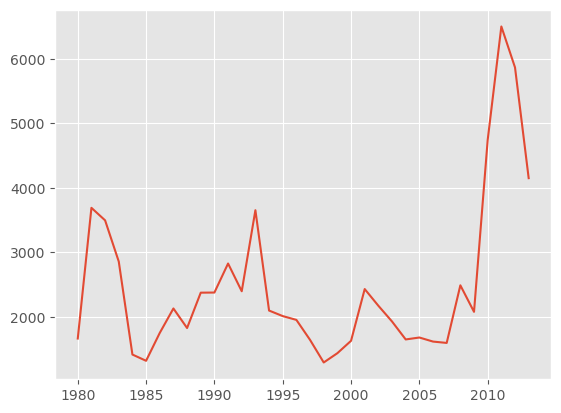

In [20]:
haiti.plot()

*pandas* automatically populated the x-axis with the index values (years), and the y-axis with the column values (population). <br>

Also, let's label the x and y axis using `plt.title()`, `plt.ylabel()`, and `plt.xlabel()` as follows:


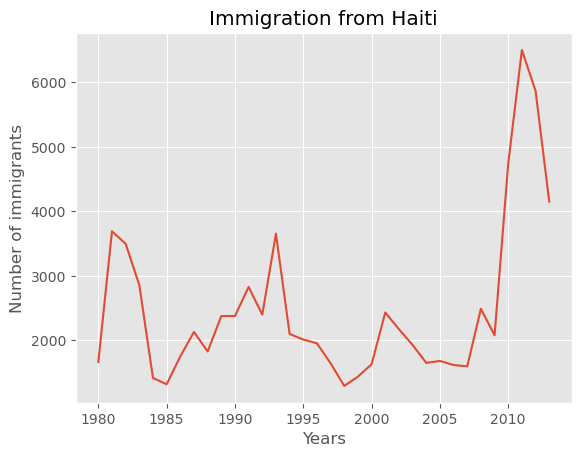

In [21]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

We can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti. Let's annotate this spike in the plot by using the `plt.text()` method.<br>
<br>
However, notice that years are of type *string*. Let's change the type of the index values to *integer* first.


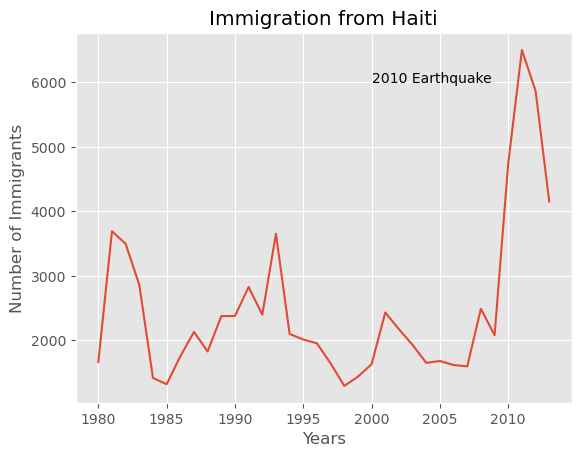

In [22]:
haiti.index = haiti.index.map(int) 
haiti.plot(kind='line')
plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

    # annotate the 2010 Earthquake. 
    # syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show() 
    

With just a few lines of code, you were able to quickly identify and visualize the spike in immigration!

Quick note on x and y values in `plt.text(x, y, label)`:
    
     Since the x-axis (years) is type 'integer', we specified x as a year. The y axis (number of immigrants) is type 'integer', so we can just specify the value y = 6000.
    
```python
    plt.text(2000, 6000, '2010 Earthquake') # years stored as type int
```
    If the years were stored as type 'string', we would need to specify x as the index position of the year. Eg 20th index is year 2000 since it is the 20th year with a base year of 1980.
```python
    plt.text(20, 6000, '2010 Earthquake') # years stored as type int
```
    We will cover advanced annotation methods in later modules.


We can easily add more countries to line plot to make meaningful comparisons immigration from different countries. 

**Question:** Let's compare the number of immigrants from India and China from 1980 to 2013.


Step 1: Get the data set for China and India, and display the dataframe.


<Axes: >

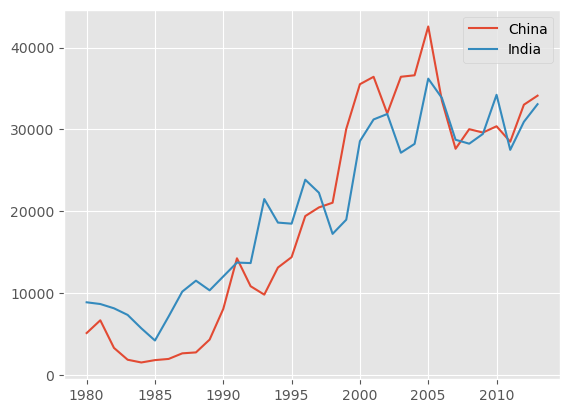

In [23]:
### type your answer here
years = list(map(str,range(1980,2014)))

china = df_can.loc[['China', "India"],years]
china = china.transpose()

china.plot()

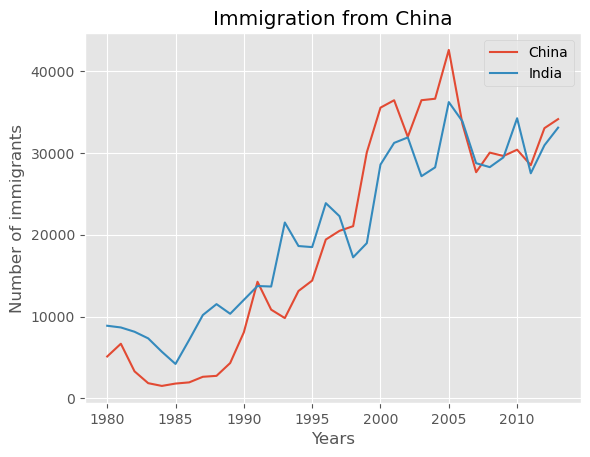

In [24]:
china.index = china.index.map(int) 
china.plot(kind='line')

plt.title('Immigration from China')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show()

<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    df_CI = df_can.loc[['India', 'China'], years]
    df_CI
```

</details>


Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.


<Axes: >

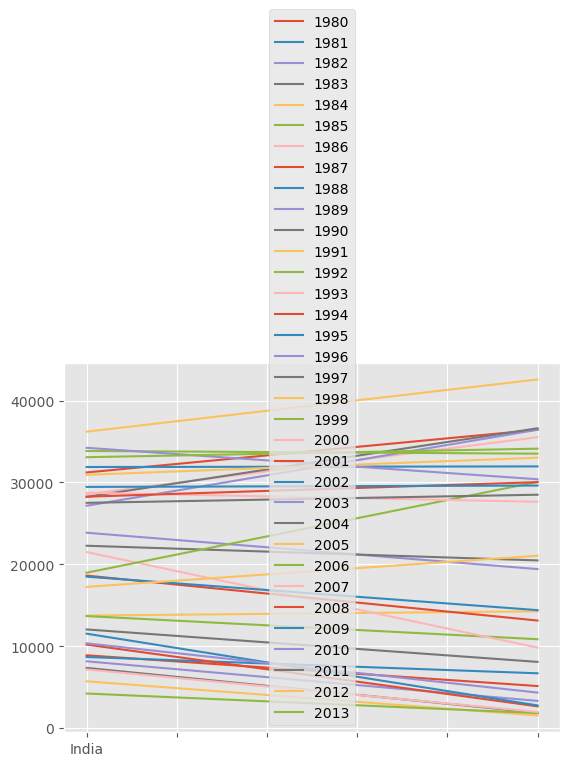

In [25]:
### type your answer here
df_CI = df_can.loc[['India', 'China'], years]
df_CI.plot()


<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    df_CI.plot(kind='line')
```

</details>


That doesn't look right...

Recall that *pandas* plots the indices on the x-axis and the columns as individual lines on the y-axis. Since `df_CI` is a dataframe with the `country` as the index and `years` as the columns, we must first transpose the dataframe using `transpose()` method to swap the row and columns.


In [26]:
df_CI = df_CI.transpose()
df_CI.head()

,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


*pandas* will auomatically graph the two countries on the same graph. Go ahead and plot the new transposed dataframe. Make sure to add a title to the plot and label the axes.


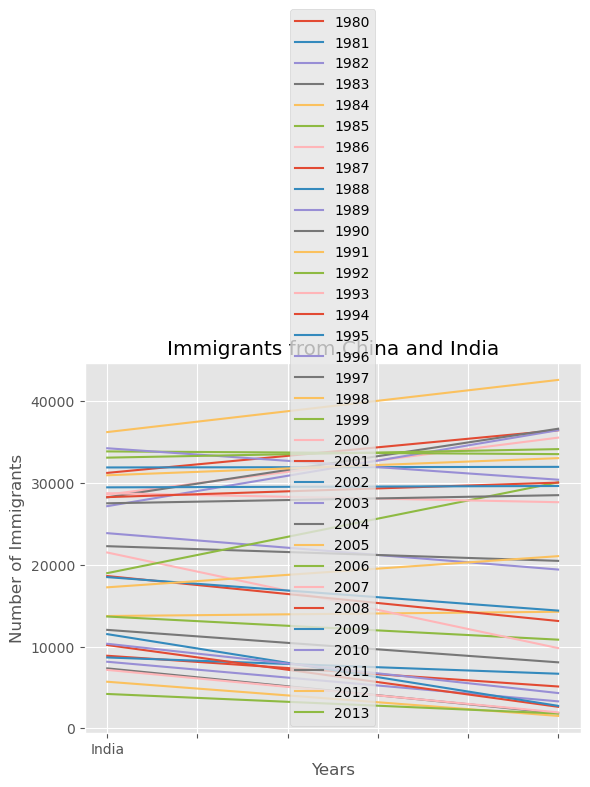

In [27]:
### type your answer here
df_CI = df_can.loc[['India', 'China'], years]
df_CI.plot(kind='line')

plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()


<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    df_CI.index = df_CI.index.map(int) # let's change the index values of df_CI to type integer for plotting
    df_CI.plot(kind='line')

    plt.title('Immigrants from China and India')
    plt.ylabel('Number of Immigrants')
    plt.xlabel('Years')

    plt.show()
```

</details>


<br>From the above plot, we can observe that the China and India have very similar immigration trends through the years. 


*Note*: How come we didn't need to transpose Haiti's dataframe before plotting (like we did for df_CI)?

That's because `haiti` is a series as opposed to a dataframe, and has the years as its indices as shown below. 
```python
print(type(haiti))
print(haiti.head(5))
```
>class 'pandas.core.series.Series' <br>
>1980    1666 <br>
>1981    3692 <br>
>1982    3498 <br>
>1983    2860 <br>
>1984    1418 <br>
>Name: Haiti, dtype: int64 <br>


Line plot is a handy tool to display several dependent variables against one independent variable. However, it is recommended that no more than 5-10 lines on a single graph; any more than that and it becomes difficult to interpret.


**Question:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.


In [28]:
### type your answer here
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
top_5 =df_can.head(5)
top_5 = top_5[years].transpose()


# country = 

# multi = df_can.loc[['China', "India"],years]
# china = china.transpose()
# china.plot()

In [ ]:
df_list

In [33]:

country = top_5.columns
df_list = df_can.loc[country, years]
df_list.head()
type(df_list)




pandas.core.frame.DataFrame

In [32]:
df_list = df_list[years].transpose()
df_list.head()

,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


In [ ]:
df_list.plot()

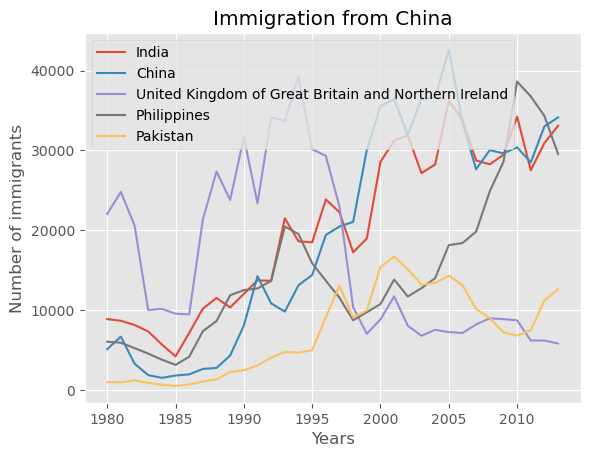

In [30]:
df_list.index = df_list.index.map(int) 
df_list.plot(kind='line')

plt.title('Immigration from China')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show()

<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:    
    #Step 1: Get the dataset. Recall that we created a Total column that calculates cumulative immigration by country. 
    #We will sort on this column to get our top 5 countries using pandas sort_values() method.
    
    inplace = True # paramemter saves the changes to the original df_can dataframe
    df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)

    # get the top 5 entries
    df_top5 = df_can.head(5)

    # transpose the dataframe
    df_top5 = df_top5[years].transpose() 

    print(df_top5)


    #Step 2: Plot the dataframe. To make the plot more readeable, we will change the size using the `figsize` parameter.
    df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
    df_top5.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size



    plt.title('Immigration Trend of Top 5 Countries')
    plt.ylabel('Number of Immigrants')
    plt.xlabel('Years')


    plt.show()

```

</details>


### Other Plots

Congratulations! you have learned how to wrangle data with python and create a line plot with Matplotlib. There are many other plotting styles available other than the default Line plot, all of which can be accessed by passing `kind` keyword to `plot()`. The full list of available plots are as follows:

* `bar` for vertical bar plots
* `barh` for horizontal bar plots
* `hist` for histogram
* `box` for boxplot
* `kde` or `density` for density plots
* `area` for area plots
* `pie` for pie plots
* `scatter` for scatter plots
* `hexbin` for hexbin plot


### Thank you for completing this lab!


## Author

<a href="https://www.linkedin.com/in/aklson/" target="_blank">Alex Aklson</a>


### Other Contributors
[Jay Rajasekharan](https://www.linkedin.com/in/jayrajasekharan),
[Ehsan M. Kermani](https://www.linkedin.com/in/ehsanmkermani),
[Slobodan Markovic](https://www.linkedin.com/in/slobodan-markovic),
[Weiqing Wang](https://www.linkedin.com/in/weiqing-wang-641640133/),
[Dr. Pooja](https://www.linkedin.com/in/p-b28802262/)

## Change Log


|  Date (YYYY-MM-DD) | Version | Changed By    |  Change Description                   |
|--------------------|---------|---------------|---------------------------------------|
| 2023-06-08         | 2.5     | Dr. Pooja         |  Updated to work with clean data csv file     |    
| 2021-05-29         | 2.4     | Weiqing Wang  |  Fixed typos and code spells.         |
| 2021-01-20         | 2.3     | Lakshmi Holla |  Changed TOC cell markdown            |
| 2020-11-20         | 2.2     | Lakshmi Holla |  Changed IBM box URL                  |
| 2020-11-03         | 2.1     | Lakshmi Holla |  Changed URL and info method          |
| 2020-08-27         | 2.0     | Lavanya       |  Moved Lab to course repo in GitLab   |




## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
